# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | lazaro cardenas
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | sarangarh
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | vostochnyy
Processing Record 9 of Set 1 | port saint john's
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | ukiah
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | batticaloa
Processing Record 14 of Set 1 | enkoping
Processing Record 15 of Set 1 | huarmey
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | fale old settlement
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | nyala
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | yuzhno-kurilsk

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,-22.57,77,75,1.03,CA,1738782596
1,lazaro cardenas,17.9583,-102.2000,29.21,51,0,3.58,MX,1738782717
2,bethel,41.3712,-73.4140,0.68,45,58,2.24,US,1738782719
3,waitangi,-43.9535,-176.5597,13.79,85,77,2.68,NZ,1738782720
4,adamstown,-25.0660,-130.1015,25.10,79,6,6.19,PN,1738782721


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,-22.57,77,75,1.03,CA,1738782596
1,lazaro cardenas,17.9583,-102.2000,29.21,51,0,3.58,MX,1738782717
2,bethel,41.3712,-73.4140,0.68,45,58,2.24,US,1738782719
3,waitangi,-43.9535,-176.5597,13.79,85,77,2.68,NZ,1738782720
4,adamstown,-25.0660,-130.1015,25.10,79,6,6.19,PN,1738782721


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

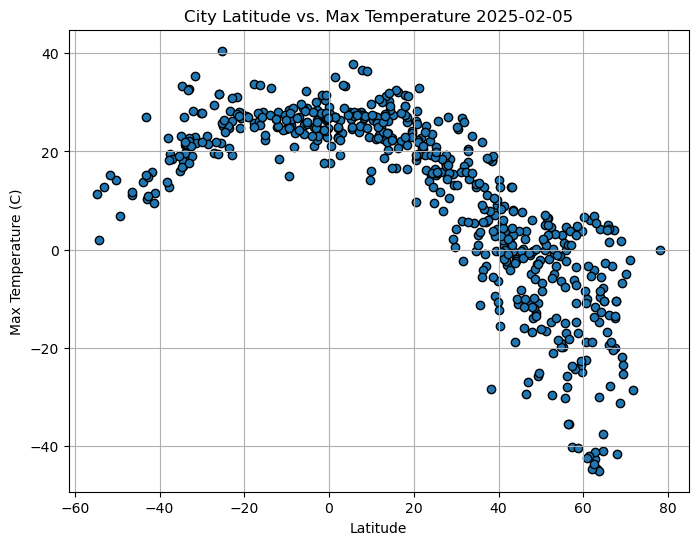

In [53]:
# Build scatter plot for latitude vs. temperature
Latitude = city_data_df["Lat"]
Temp = city_data_df["Max Temp"]

# Get today's date
today_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.figure(figsize=(8, 6))
plt.scatter(Latitude, Temp, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title (f"City Latitude vs. Max Temperature {(today_date)}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

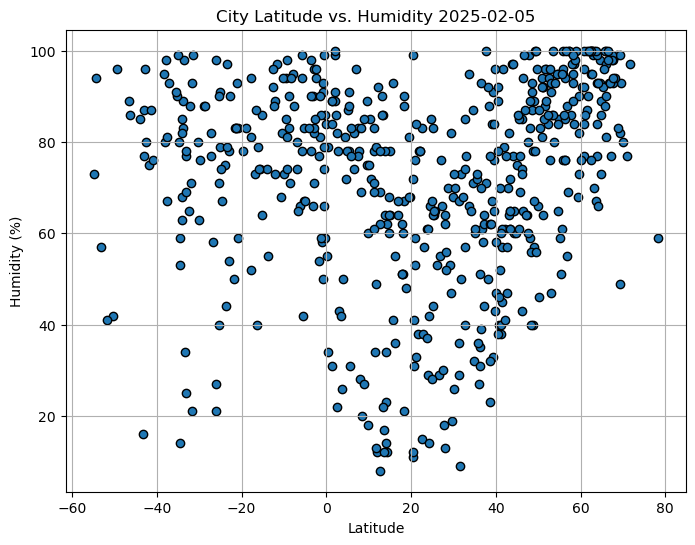

In [55]:
# Build the scatter plots for latitude vs. humidity
Latitude = city_data_df["Lat"]
Humidity = city_data_df["Humidity"]

# Get today's date
today_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.figure(figsize=(8, 6))
plt.scatter(Latitude, Humidity, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title (f"City Latitude vs. Humidity {today_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

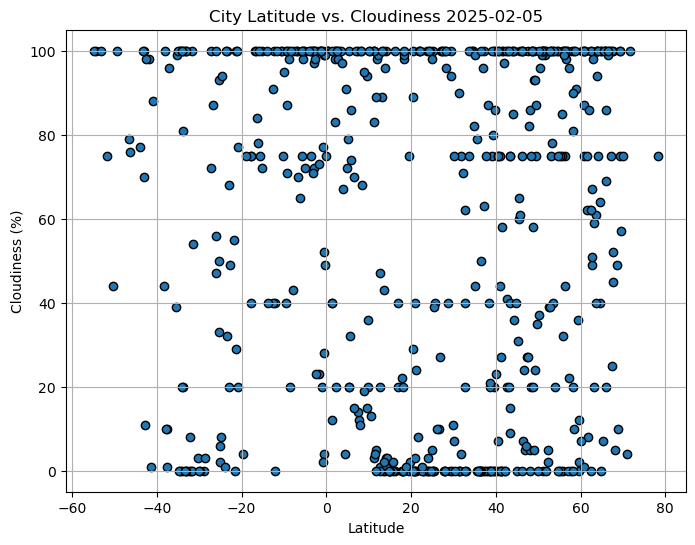

In [57]:
# Build the scatter plots for latitude vs. cloudiness
Latitude = city_data_df["Lat"]
Clouds = city_data_df["Cloudiness"]

# Get today's date
today_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.figure(figsize=(8, 6))
plt.scatter(Latitude, Clouds, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title (f"City Latitude vs. Cloudiness {today_date}")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

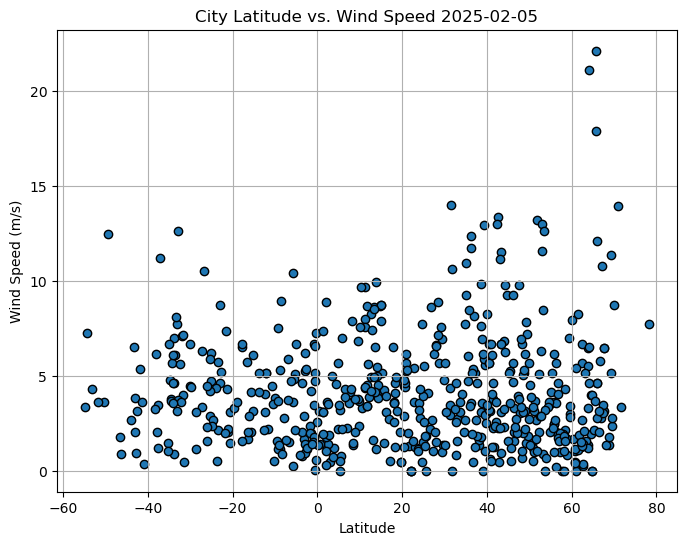

In [59]:
# Build the scatter plots for latitude vs. wind speed
Latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

# Get today's date
today_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.figure(figsize=(8, 6))
plt.scatter(Latitude, wind_speed, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title (f"City Latitude vs. Wind Speed {today_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y):
    slope, intercept, r_value, p_value, std_err = linreg.linregress(x, y)
    regression_line = slope * x + intercept

In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,-22.57,77,75,1.03,CA,1738782596
1,lazaro cardenas,17.9583,-102.2000,29.21,51,0,3.58,MX,1738782717
2,bethel,41.3712,-73.4140,0.68,45,58,2.24,US,1738782719
5,sarangarh,21.6000,83.0833,22.67,38,8,1.30,IN,1738782722
7,vostochnyy,55.8167,37.8667,-0.09,100,100,2.48,RU,1738782701


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,13.79,85,77,2.68,NZ,1738782720
4,adamstown,-25.0660,-130.1015,25.10,79,6,6.19,PN,1738782721
6,margaret river,-33.9500,115.0667,18.53,85,0,6.97,AU,1738782723
8,port saint john's,-31.6229,29.5448,22.91,93,100,4.00,ZA,1738782725
14,huarmey,-10.0681,-78.1522,24.49,73,95,3.81,PE,1738782732


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6941436034576673


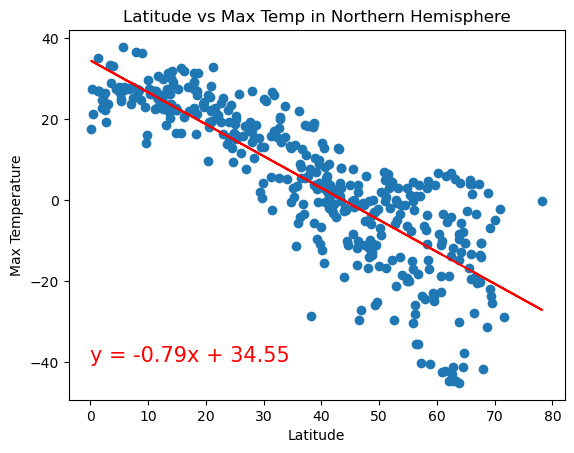

In [121]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Latitude vs Max Temp in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3441915909808651


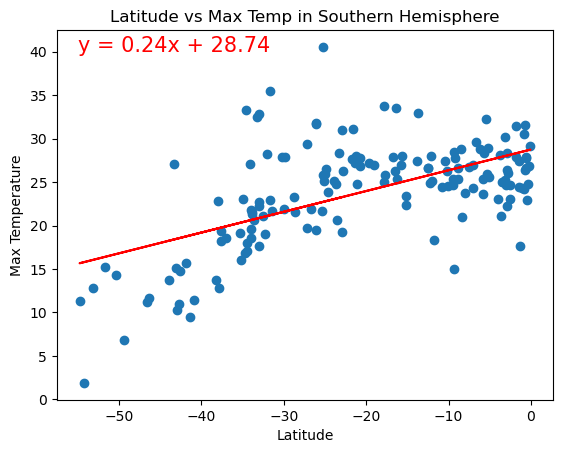

In [127]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Latitude vs Max Temp in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The linear relationship graphs show that there is a strong negative correlation between temperature and latitude in the Northern Hemisphere with R square value of 0.69. As latitude increases the maximum temperature decreases. However, there is a weak correlation between temperature and latitude in the southern hemisphere with R square value of 0.34.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.19167530805968241


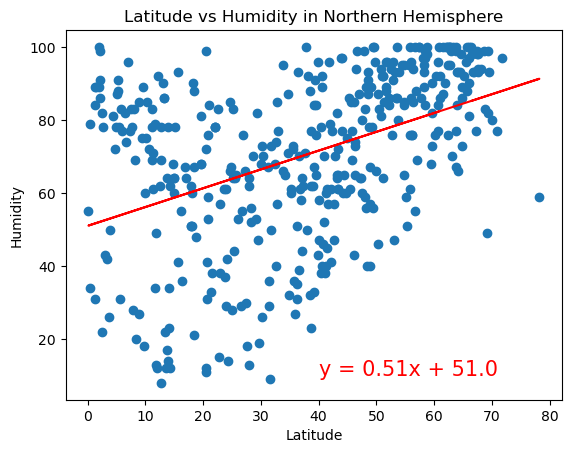

In [129]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.020016589955378354


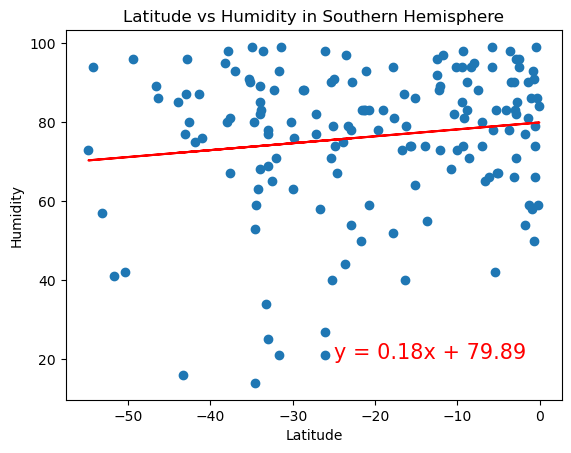

In [131]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a weak linear relationship between humidity and latitude in both northern and southern hemispheres as the R square value is less than 0.2

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.019315601186827302


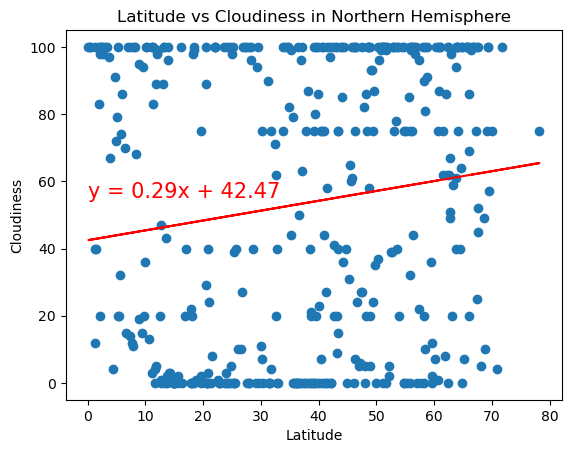

In [133]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03636305765717223


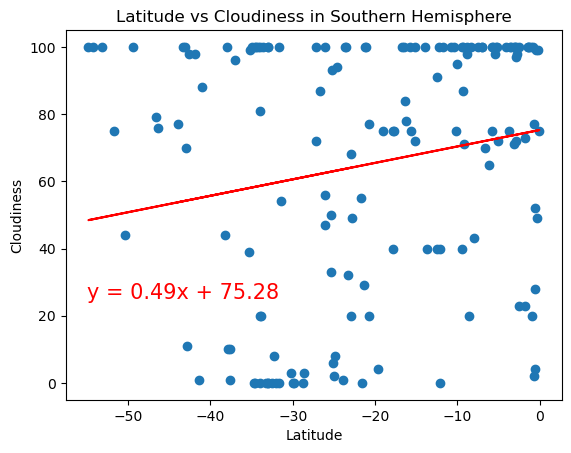

In [135]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a weak linear relationship between cloudiness and latitude in both northern and southern hemisphere with R square value close to 0.02 to 0.04. So, the linear regression model does not explain much of the variance in cloudiness due to latitide.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0011057684095995563


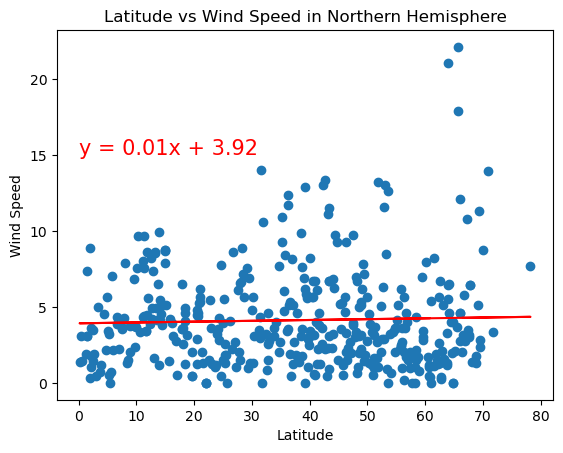

In [115]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.035029675495540064


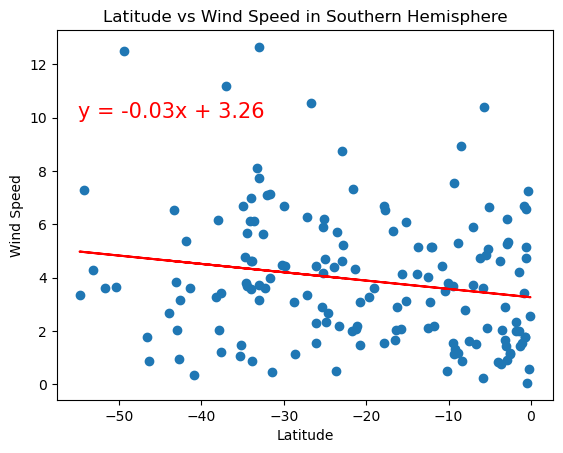

In [119]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a weak linear relationship between wind speed and latitude in both northern and southern hemisphere with R square value less than 0.04. The linear regression is weaker in Northern Hemisphere with R square less than 0.001